In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
road = cv2.imread("DATA/road_image.jpg")
road_copy = road.copy()

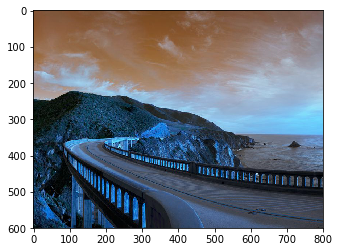

In [3]:
plt.imshow(road)

In [4]:
# Making Markers and Segments

In [5]:
markers = np.zeros(road.shape[:2], dtype = np.int32)

In [6]:
segments = np.zeros(road.shape, dtype=np.int8)

In [7]:
markers.shape

(600, 800)

In [8]:
segments.shape

(600, 800, 3)

In [9]:
# Color Mapping

from matplotlib import cm

In [10]:
cm.tab10(0)

# Note the color of RGB and alpha id b/w 0 and 1 we need to scale it to 0 to 255 also

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [11]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [12]:
colors = []

for i in range(10):
    colors.append(create_rgb(i))

In [13]:
colors

# NOTE channels of red and blue are switch 

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [14]:
# GLOBAL VARIABLES

# COLOR CHOICE 
current_marker = 1
n_markers = 10

# MARKS UPDATED BY WATERSHED ALGORITH
marks_updated = False


In [15]:
# CALLBACK FUNCTION

def mouse_callback(event,x,y,flags,params):
    global marks_updated 
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # MARKERS PASSED TO THE WATERSHED ALGORITH
        cv2.circle(marker_image,(x,y), 10, (current_marker), -1)
        
        # MARKERS THAT WE SEE ON THE ROAD IMAGE
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1)
        
        marks_updated = True

In [ ]:
# WHILE TRUE

cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)


while True:
    
    cv2.imshow("Road Image", road_copy)
    cv2.imshow('Watershed Segments', segments)
    
    #CLOSE ALL WINDOWS
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
    # CLEARING ALL COLORS PRESS C KEY
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype = np.int32)
        segments = np.zeros(road.shape, dtype=np.int8)
        
    # UPDATE COLOR CHOICE
    elif k>0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    # UPDATE THE MARKINGS
    if marks_updated :
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = segments = np.zeros(road.shape, dtype=np.int8)
        
        for color_ind in range(n_markers):
            #COLORING SEGMENTS, NUMPY CALL
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
    
    
cv2.destroyAllWindows()

NameError: name 'marker_image' is not defined

NameError: name 'marker_image' is not defined

NameError: name 'marker_image' is not defined

NameError: name 'marker_image' is not defined

NameError: name 'marker_image' is not defined

NameError: name 'marker_image' is not defined

NameError: name 'marker_image' is not defined

NameError: name 'marker_image' is not defined

NameError: name 'marker_image' is not defined